In [62]:
import plotly.express as px
import pandas as pd
import numpy as np
from bokeh.plotting import figure 
import matplotlib.pyplot as plt
from bokeh.io import show, output_notebook
output_notebook()

Loading BokehJS ...

Recordemos la importancia de una buena visualización...
Como científicos de datos, es muy importante dar a entender los resultados a personas que tengas pocos o nulos conocimientos, poor esta razón, es importante que se esté muy bien entrenado en realizar gráficas para explicar e informar tendencias, patrones o diferencias... La pregunta es ¿cuál es la mejor gráfica para nuestra audiencia? :)



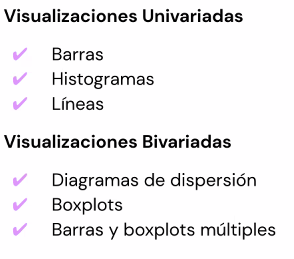

In [6]:
df=pd.read_csv("https://raw.githubusercontent.com/ven-27/datasets/master/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Bokeh: 
Gráficos interactivos

### Gráfica de barras

In [14]:
df_x=df[["Survived","Pclass"]].groupby(by=["Pclass"]).count()
df_x

,Survived
Pclass,
1,216
2,184
3,491


In [27]:
#La parte de output notebook que se hizo al inicio nos garantiza que la ventana de bokeh no se abra en otra pestaña
p=figure(min_width=500,height=500,title="Clases sobrevivientes")
p.vbar(x=df_x.index, top=df_x["Survived"],width=0.5)
p.yaxis.axis_label= "Número de sobrevivientes"
p.xaxis.axis_label= "Clase"
show(p)

### Histogramas

In [34]:
data=df["Age"].values
#Con el método values cambio de dataframe a numpy array
np.isnan(data)#devuelve un array donde hay bool indicando dónde hay nan
data=data[~np.isnan(data)] #Array solo con los valores no NaN
data

array([22.  , 38.  , 26.  , 35.  , 35.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 14.  , 55.  ,  2.  , 31.  , 35.  ,
       34.  , 15.  , 28.  ,  8.  , 38.  , 19.  , 40.  , 66.  , 28.  ,
       42.  , 21.  , 18.  , 14.  , 40.  , 27.  ,  3.  , 19.  , 18.  ,
        7.  , 21.  , 49.  , 29.  , 65.  , 21.  , 28.5 ,  5.  , 11.  ,
       22.  , 38.  , 45.  ,  4.  , 29.  , 19.  , 17.  , 26.  , 32.  ,
       16.  , 21.  , 26.  , 32.  , 25.  ,  0.83, 30.  , 22.  , 29.  ,
       28.  , 17.  , 33.  , 16.  , 23.  , 24.  , 29.  , 20.  , 46.  ,
       26.  , 59.  , 71.  , 23.  , 34.  , 34.  , 28.  , 21.  , 33.  ,
       37.  , 28.  , 21.  , 38.  , 47.  , 14.5 , 22.  , 20.  , 17.  ,
       21.  , 70.5 , 29.  , 24.  ,  2.  , 21.  , 32.5 , 32.5 , 54.  ,
       12.  , 24.  , 45.  , 33.  , 20.  , 47.  , 29.  , 25.  , 23.  ,
       19.  , 37.  , 16.  , 24.  , 22.  , 24.  , 19.  , 18.  , 19.  ,
       27.  ,  9.  , 36.5 , 42.  , 51.  , 22.  , 55.5 , 40.5 , 51.  ,
       16.  , 30.  ,

In [36]:
histo,edges=np.histogram(data,bins=20)
#primer array son las frecuencias
#segundo array edades que corresponden a la frecuencia 

In [37]:
p=figure(title="Histograma edades")
p.quad(top = histo,bottom=0,left=edges[:-1],right=edges[1])
show(p)

### Boxplot

In [78]:
from bokeh.io import show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6
from bokeh.plotting import figure
output_notebook()

fruits = ['Apples', 'Pears', 'Nectarines', 'Plums', 'Grapes', 'Strawberries']
counts = [5, 3, 4, 2, 4, 6]

source = ColumnDataSource(data=dict(fruits=fruits, counts=counts, color=Spectral6))

p = figure(x_range=fruits, y_range=(0,9), height=250, title="Fruit counts",
           toolbar_location=None, tools="")

p.vbar(x='fruits', top='counts', width=0.9, color='color', legend_field="fruits", source=source)

p.xgrid.grid_line_color = None
p.legend.orientation = "horizontal"
p.legend.location = "top_center"

show(p)


Loading BokehJS ...

### Treemaps
Intro a plotly

In [39]:
data = pd.read_csv('athlete_events.csv')

In [40]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [48]:
df_grouped=data.groupby("Name")[["Sex","Sport"]].last()
df_grouped

,Sex,Sport
Name,,
"Gabrielle Marie ""Gabby"" Adcock (White-)",F,Badminton
Eleonora Margarida Josephina Scmitt,F,Swimming
Jean Hauptmanns,M,Wrestling
Luis ngel Fernando de los Santos Grossi,M,Cycling
Th Anh,F,Fencing
...,...,...
zge Krdar emberci,F,Volleyball
zlem Kaya,F,Athletics
zman Graud,M,Shooting


In [81]:
df_grouped["count"] = 1
df_grouped



,Sex,Sport,count
Name,,,
"Gabrielle Marie ""Gabby"" Adcock (White-)",F,Badminton,1
Eleonora Margarida Josephina Scmitt,F,Swimming,1
Jean Hauptmanns,M,Wrestling,1
Luis ngel Fernando de los Santos Grossi,M,Cycling,1
Th Anh,F,Fencing,1
...,...,...,...
zge Krdar emberci,F,Volleyball,1
zlem Kaya,F,Athletics,1
zman Graud,M,Shooting,1


In [80]:
px.treemap(df_grouped,path=["Sport","Sex"],values="count")


### Radar

In [79]:
df= pd.DataFrame(dict(r=[1,5,2,2,3],theta=["cost","mechanical","chemical","therma","device"]))
px.line_polar(df,r="r",theta="theta",line_close=True)

Libro recomendado:
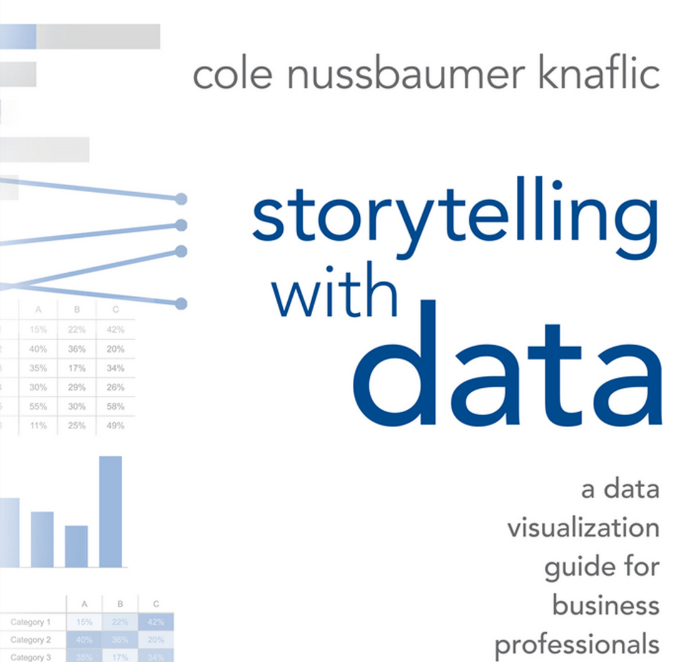